任务一：有 6 家上市公司的股票代码、市值与市盈率数据如下，请按照下面要求利用 pandas 对该组数据进行数据分析统计。
![Jupyter](https://cdn.py2china.cn/study-group/pandas/5-1.png)

请根据上方表格数据创建一个 DataFrame 存储公司的数据，数据源如下所示，数据命名为 df_company（阅读参考文章①）

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dic1={
    'marketcap': [449, 371, 237, 21313, 1369, 823], 
    'pe': [8.31, 15.36, 16.01, 7.16, 7.59, 6.3],
    'code': ['600926', '002958', '601128', '601398', '601229', '600919']
}

index = ['杭州银行', '青农商行', '常熟银行', '工商银行', '上海银行', '江苏银行']

In [9]:
df_company=pd.DataFrame(dic1,index)
df_company.index.name='company'

选出市值低于 2000 亿的所有公司（任务提示：使用布尔形式选取数据，阅读参考文章②③）

In [19]:
print(df_company.loc[df_company.marketcap<2000])

         marketcap     pe    code
company                          
杭州银行           449   8.31  600926
青农商行           371  15.36  002958
常熟银行           237  16.01  601128
上海银行          1369   7.59  601229
江苏银行           823   6.30  600919


选出市值 < 2000亿，并且市盈率 < 10 的所有公司（任务提示：使用布尔形式选取数据，阅读参考文章②③）

In [24]:
print(df_company.loc[df_company.marketcap<2000].loc[df_company.pe<10]) #为什么这里第二个loc不加会警告index, 因为会引起语义不明，所以这种方式或下一种

         marketcap    pe    code
company                         
杭州银行           449  8.31  600926
上海银行          1369  7.59  601229
江苏银行           823  6.30  600919


In [56]:
print(df_company[(df_company.marketcap<2000) & (df_company.pe<10)]) #切df尽量用&|， 用and or偶尔会报错

         marketcap    pe    code
company                         
杭州银行           449  8.31  600926
上海银行          1369  7.59  601229
江苏银行           823  6.30  600919


假设其中一家公司股票的每日收盘价数据，如下
<code>
import numpy as np
​
dr = pd.date_range(start='2019-01-02', periods=100)
​
data = np.random.randn(100).cumsum()
​
close = data - np.min(data)
​
df = pd.DataFrame({"close": close}, index=dr)
​
df
</code>
请计算收盘价的五日平均，并新增一列存储（任务提示：使用窗函数rolling计算移动平均，阅读参考文章④）

In [35]:
dr = pd.date_range(start='2019-01-02', periods=100)

data = np.random.randn(100).cumsum()

close = data - np.min(data)

df = pd.DataFrame({"close": close}, index=dr)
print(df)

               close
2019-01-02  7.097882
2019-01-03  5.626726
2019-01-04  4.796554
2019-01-05  3.915976
2019-01-06  3.636878
...              ...
2019-04-07  1.873161
2019-04-08  0.000000
2019-04-09  0.920615
2019-04-10  0.885247
2019-04-11  2.995852

[100 rows x 1 columns]


               close      mean
2019-01-02  7.097882       NaN
2019-01-03  5.626726       NaN
2019-01-04  4.796554       NaN
2019-01-05  3.915976       NaN
2019-01-06  3.636878  5.014803
...              ...       ...
2019-04-07  1.873161  1.754700
2019-04-08  0.000000  1.335044
2019-04-09  0.920615  1.194586
2019-04-10  0.885247  0.951531
2019-04-11  2.995852  1.334975

[100 rows x 2 columns]


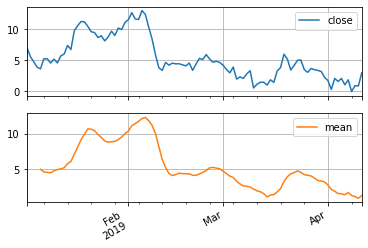

In [44]:
df.mean=df.rolling(5).mean()
df[['close','mean']].plot(subplots=True,grid=True)
print(df)
plt.show()

任务二：请将下方表格数据存储在 DataFrame 中，然后按要求完成练习
<img src='https://cdn.py2china.cn/study-group/pandas/5-2.png'/>
创建 DataFrame 存储数据（提示：此表格中，元素依次递增，可先利用np.array创建一维数组，再通过reshape方法变为二维数组，最后利用二维数组直接创建DataFrame，阅读参考文章①）

In [57]:
arr=np.arange(1,17).reshape(4,-1)
ind='abcd'
col=['第1列','第2列', '第3列', '第4列']
df2=pd.DataFrame(arr,index=list(ind),columns=col)
print(df2)

   第1列  第2列  第3列  第4列
a    1    2    3    4
b    5    6    7    8
c    9   10   11   12
d   13   14   15   16


请利用 apply 函数，统计出每一行的总和（阅读参考文章⑤⑥）

In [61]:
df2.apply(lambda x:x.sum(),axis=1)

a     20.0
b     52.0
c     84.0
d    116.0
dtype: float64

请生成第 5 列数据，使其满足：当第 3 列数据 > 10 时，第 5 列数据等于第 1 、第 2 列数据之和；否则第 5 列数据等于第 3 列数据（阅读参考文章⑤⑥）

In [71]:
df2['第5列']=df2.apply(lambda x:x[1]+x[2] if x[3]>10 else x[3], axis=1)
print(df2)

   第1列  第2列  第3列  第4列   第5列
a    1    2    3    4   4.0
b    5    6    7    8   8.0
c    9   10   11   12  21.0
d   13   14   15   16  29.0
